In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning3/MachineLearning1/winequality-white.csv',sep=';')
quality = df['quality'].values
df['y'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])
meanX = np.mean(X,axis=0)
stdX = np.std(X,axis=0)
#Normalize X
X = (X - meanX)/stdX

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)
quality_train,quality_test = train_test_split(quality,test_size=0.2,random_state=random_state)

(3918, 11)

## EM algorithm

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2,random_state=random_state)
gmm.fit(X_train)

GaussianMixture(n_components=2, random_state=75)

In [28]:
gmm.predict(X_train)

array([1, 1, 1, ..., 1, 1, 0])

In [218]:
from sklearn.metrics import silhouette_score
sil_list_em = []
for i in range(2,11):
    gmm = GaussianMixture(n_components=i,random_state=random_state)
    gmm.fit(X_train)
    sil_list_em.append(silhouette_score(X_train,gmm.predict(X_train)))

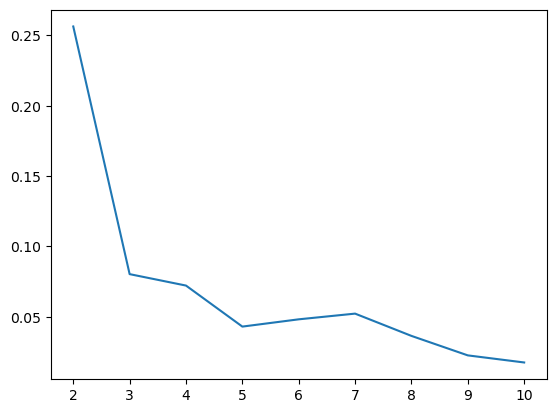

In [219]:
plt.plot(range(2,11),sil_list_em)

#Increasing the number of clusters reduce the silhouette scores -> Noisy ? Cant really detect it
Fall fasts 

In [5]:
from sklearn.metrics import confusion_matrix
gmm = GaussianMixture(n_components=2,random_state=random_state)
gmm.fit(X_train)

GaussianMixture(n_components=2, random_state=75)

In [247]:
#get clusters centers for gmm
gmm.means_

array([[ 0.00274897,  1.02935856,  0.61240764,  0.11242235,  1.4310554 ,
         0.22504321,  0.20837389,  0.40351419, -0.24935252, -0.225523  ,
        -0.56050664],
       [-0.00227842, -0.125257  , -0.0769314 , -0.01096137, -0.17079414,
        -0.01490869, -0.01142134, -0.05236069,  0.03382155,  0.02898562,
         0.08139167]])

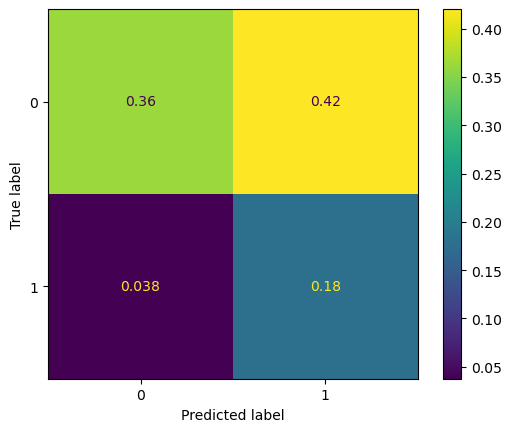

In [40]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm_gmm = confusion_matrix(y_train,gmm.predict(X_train),normalize='all')
dispcm = ConfusionMatrixDisplay(confusion_matrix=cm_gmm,display_labels=['0','1'])

disp.plot()



### Plot the 2 clusters in 2D (projection with pca)

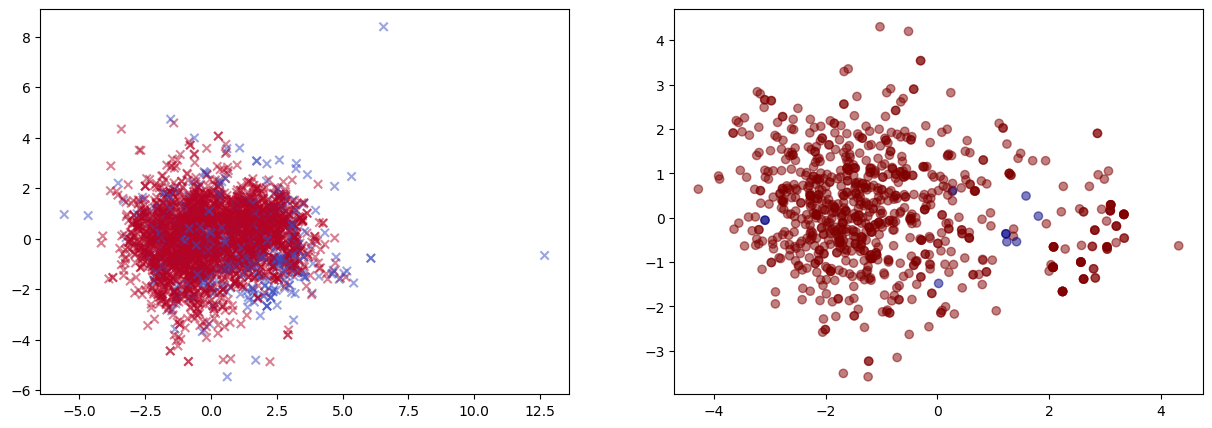

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

#Plot the projected with x marker if y_train is 0 and + marker if y_train is 1
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].scatter(X_train_pca[y_train == 0,0],X_train_pca[y_train == 0,1],c=gmm.predict(X_train)[y_train == 0],cmap='coolwarm',marker='x',alpha=0.5)
ax[1].scatter(X_train_pca[y_train == 1,0],X_train_pca[y_train == 1,1],c=gmm.predict(X_train)[y_train == 1],cmap='jet',marker='o',alpha=0.5)



analysis of cluster for em

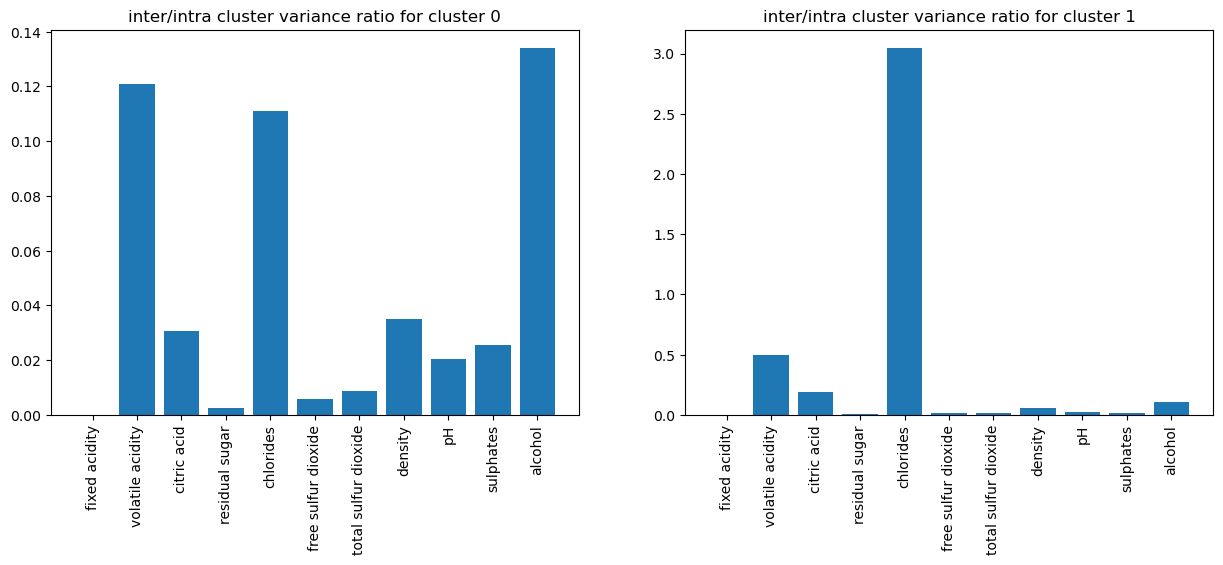

In [255]:
#get intra cluster variance for each features
intra_cluster_variance_em = []
for i in range(2):
    intra_cluster_variance_em.append(np.var(X_train[gmm.predict(X_train) == i],axis=0))
    
#get inter cluster variance for each features
inter_cluster_variance_em = np.var(gmm.means_,axis=0)

#compute the ratio
ratio = inter_cluster_variance_em/intra_cluster_variance_em
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(range(11),ratio[0],label='cluster 0')
ax[1].bar(range(11),ratio[1],label='cluster 1')
ax[0].set_xticks(range(11),df.columns[:-1],rotation=90)
ax[1].set_xticks(range(11),df.columns[:-1],rotation=90)
ax[0].set_title('inter/intra cluster variance ratio for cluster 0')
ax[1].set_title('inter/intra cluster variance ratio for cluster 1')

plt.show()

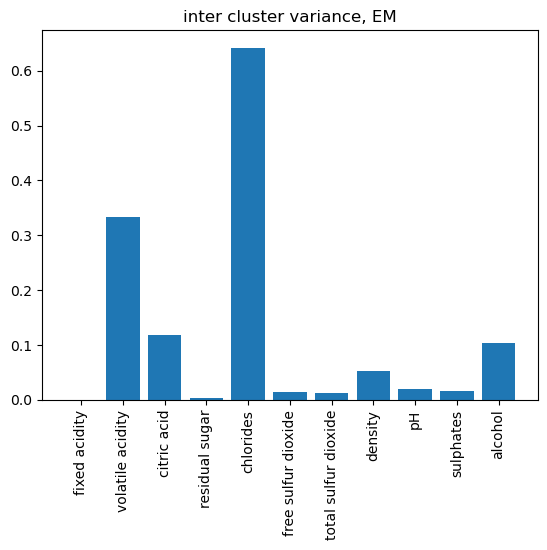

In [261]:
plt.bar(range(11),inter_cluster_variance_em)
plt.xticks(range(11),df.columns[:-1],rotation=90)
plt.title('inter cluster variance, EM')
plt.show()

Text(0, 0.5, 'normalized chlorides')

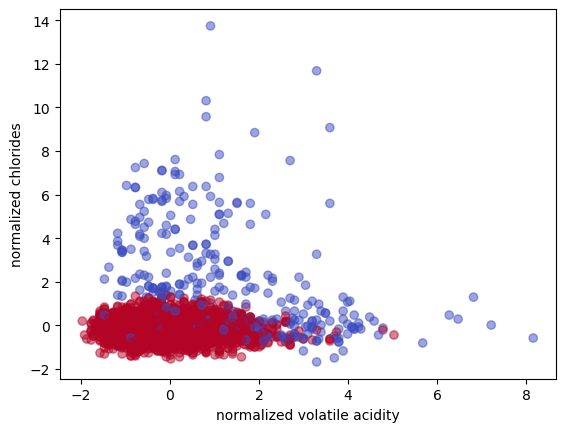

In [260]:
#scatter plot
col1 = 'volatile acidity'
col2 = 'chlorides'

indcol1 = df.columns.get_loc(col1)
indcol2 = df.columns.get_loc(col2)

plt.scatter(X_train[:,indcol1],X_train[:,indcol2],c=gmm.predict(X_train),cmap='coolwarm',alpha=0.5)
plt.xlabel("normalized "+col1)
plt.ylabel("normalized "+col2)

## Kmeans

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_list = []

for i in range(2,12):
    
    kmeans = KMeans(n_clusters=i,random_state=random_state)
    kmeans.fit(X_train)
    sil_list.append(silhouette_score(X_train,kmeans.predict(X_train)))

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_common._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 177, in where
KeyboardInterrupt: 
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

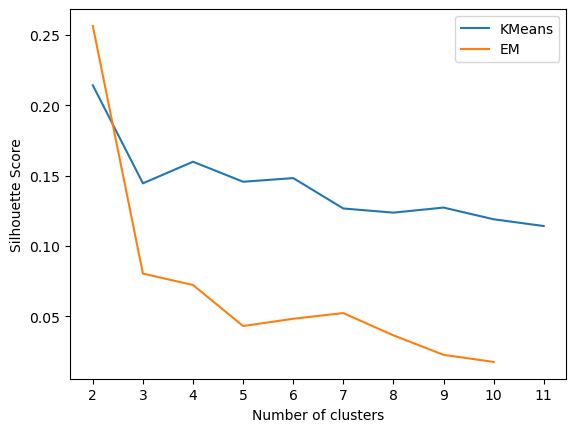

In [221]:
plt.plot(range(2,12),sil_list,label = 'KMeans')
plt.plot(range(2,11),sil_list_em,label = 'EM')
plt.xticks(range(2,12))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [8]:
km = KMeans(n_clusters=2,random_state=random_state)
km.fit(X_train)

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=75)

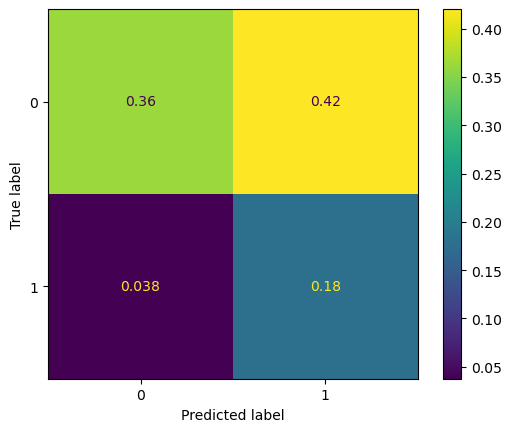

In [39]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm_km = confusion_matrix(y_train,km.predict(X_train),normalize='all')
dispkm = ConfusionMatrixDisplay(confusion_matrix=cm_km,display_labels=['0','1'])

disp.plot()


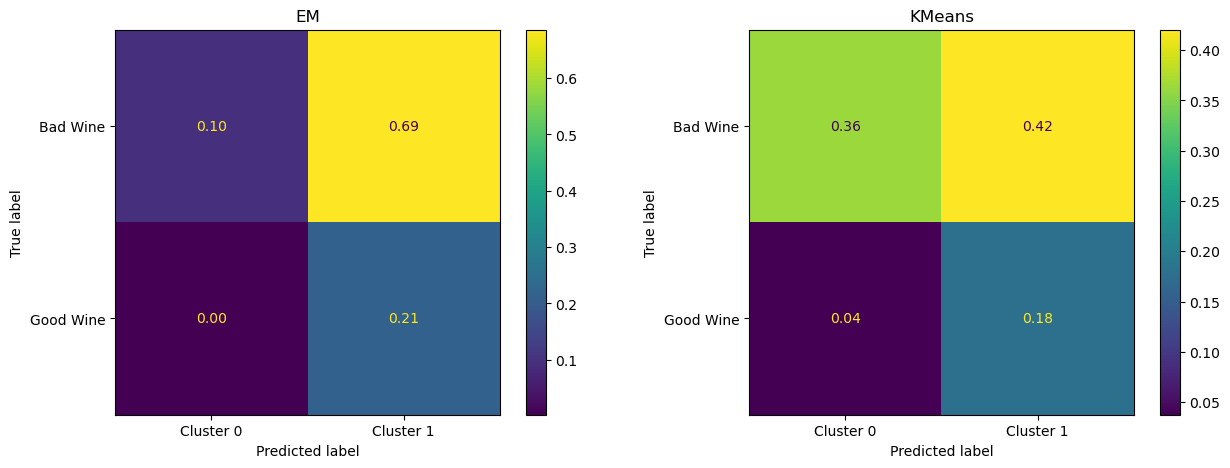

In [49]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax[0] = dispcm.plot(ax=ax[0],values_format='.2f')
ax[0].ax_.set_title('EM')
ax[0].ax_.set_xticks(range(2),['Cluster 0','Cluster 1'])
ax[0].ax_.set_yticks(range(2),['Bad Wine','Good Wine'])
ax[1] = dispkm.plot(ax=ax[1],values_format='.2f')
ax[1].ax_.set_title('KMeans')
ax[1].ax_.set_xticks(range(2),['Cluster 0','Cluster 1'])
ax[1].ax_.set_yticks(range(2),['Bad Wine','Good Wine'])



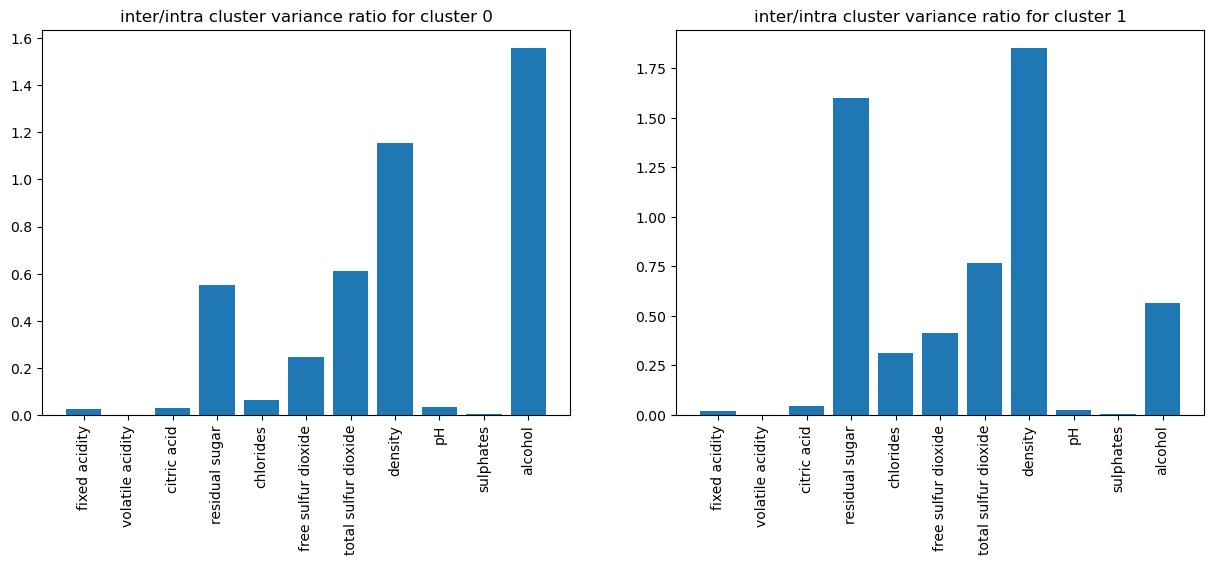

In [237]:
#get intra cluster variance for each features
intra_cluster_variance = []
for i in range(2):
    intra_cluster_variance.append(np.var(X_train[km.predict(X_train) == i],axis=0))
    
#get inter cluster variance for each features
inter_cluster_variance = np.var(km.cluster_centers_,axis=0)

#compute the ratio
ratio = inter_cluster_variance/intra_cluster_variance
fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].bar(range(11),ratio[0],label='cluster 0')
ax[1].bar(range(11),ratio[1],label='cluster 1')
ax[0].set_xticks(range(11),df.columns[:-1],rotation=90)
ax[1].set_xticks(range(11),df.columns[:-1],rotation=90)
ax[0].set_title('inter/intra cluster variance ratio for cluster 0')
ax[1].set_title('inter/intra cluster variance ratio for cluster 1')

plt.show()

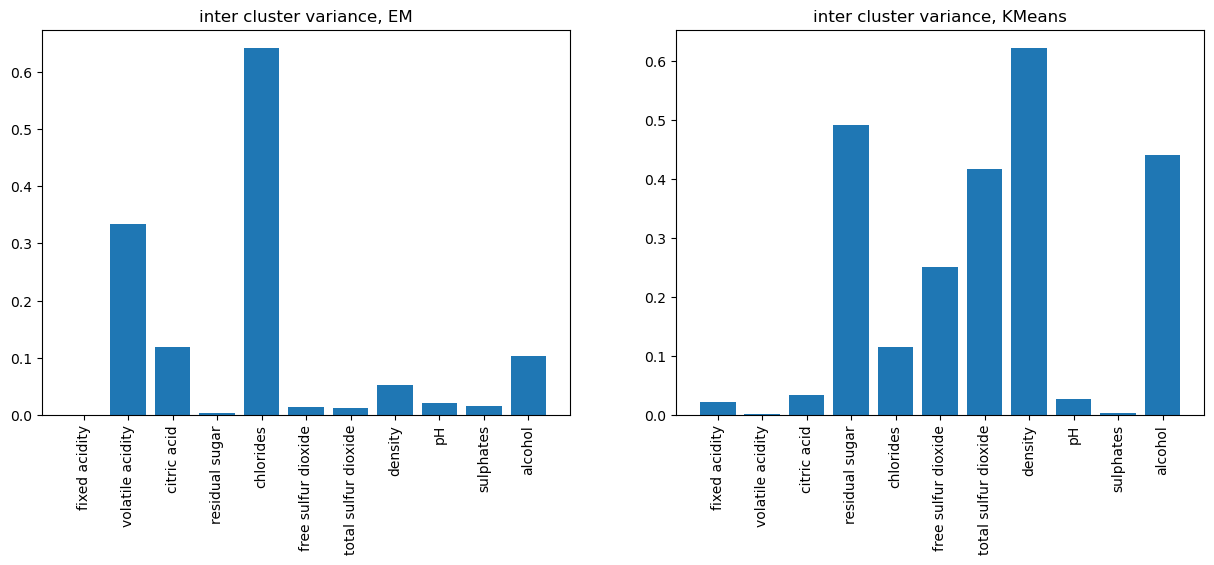

In [265]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].bar(range(11),inter_cluster_variance_em)
ax[0].set_xticks(range(11),df.columns[:-1],rotation=90)
ax[0].set_title('inter cluster variance, EM')


ax[1].bar(range(11),inter_cluster_variance)
ax[1].set_xticks(range(11),df.columns[:-1],rotation=90)
ax[1].set_title('inter cluster variance, KMeans')
plt.show()

Text(0, 0.5, 'normalized density')

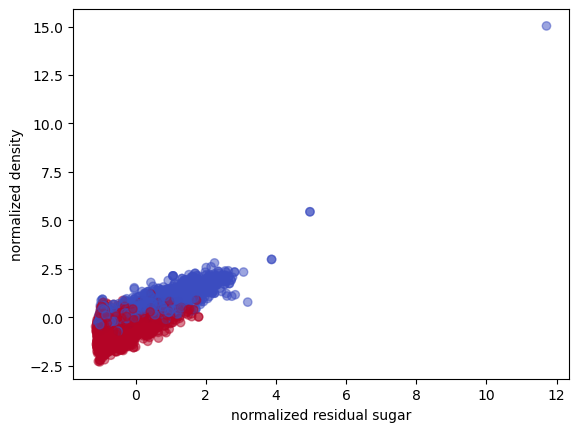

In [270]:
#scatter plot
col1 = 'residual sugar'
col2 = 'density'

indcol1 = df.columns.get_loc(col1)
indcol2 = df.columns.get_loc(col2)

plt.scatter(X_train[:,indcol1],X_train[:,indcol2],c=km.predict(X_train),cmap='coolwarm',alpha=0.5)
plt.xlabel("normalized "+col1)
plt.ylabel("normalized "+col2)

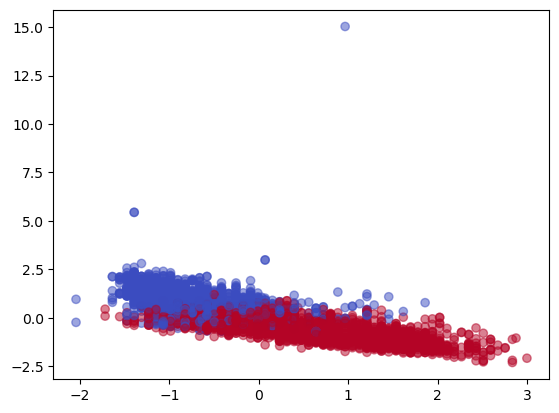

In [243]:
#scatter plot
col1 = 'alcohol'
col2 = 'density'

indcol1 = df.columns.get_loc(col1)
indcol2 = df.columns.get_loc(col2)

plt.scatter(X_train[:,indcol1],X_train[:,indcol2],c=km.predict(X_train),cmap='coolwarm',alpha=0.5)

Two type of wine, good ones are surrounded by bad ones

In [200]:
clusterPred = km.predict(X_train)

#mean grade of each cluster
np.mean(quality_train[np.logical_and(clusterPred == 0,y_train == 0)]),np.mean(quality_train[np.logical_and(clusterPred == 1,y_train == 0)])

(5.443429374560787, 5.585306618093504)

In [54]:
#Variance inflation factor for X_train
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))
for _,i in enumerate(vif):
    print(df.columns[_],':',i)

fixed acidity : 2.5451617408661824
volatile acidity : 1.1457944704966159
citric acid : 1.1609925644490124
residual sugar : 12.202014462473523
chlorides : 1.2412911637013897
free sulfur dioxide : 1.7681567084772905
total sulfur dioxide : 2.215975522384029
density : 26.571052961085122
pH : 2.1583290959931785
sulphates : 1.1331198053648872
alcohol : 7.257179216896475


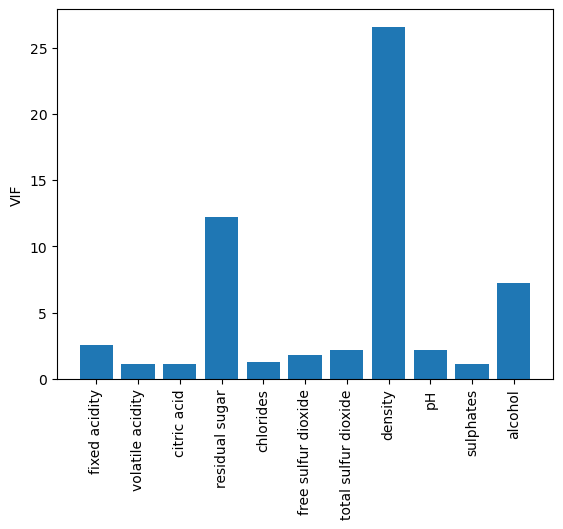

In [55]:
#barplot of the variance inflation factor
plt.bar(range(11),vif)
plt.xticks(range(11),df.columns[:-1],rotation=90)
plt.ylabel('VIF')
plt.show()

## PCA

In [59]:
from sklearn.decomposition import PCA, FastICA

pca = PCA(n_components=11,random_state=random_state)
pca.fit(X_train)

PCA(n_components=11, random_state=75)

PCA 1 components: 0.29283230022483825
PCA 2 components: 0.43354636889483755
PCA 3 components: 0.5451844525100521
PCA 4 components: 0.6398352410115067
PCA 5 components: 0.7281754387826193
PCA 6 components: 0.8138800552768554
PCA 7 components: 0.8798250614454604
PCA 8 components: 0.9335828541490976
PCA 9 components: 0.9715317052779257
PCA 10 components: 0.9980008832843974
PCA 11 components: 1.0


Text(0, 0.5, 'Cumulative explained variance')

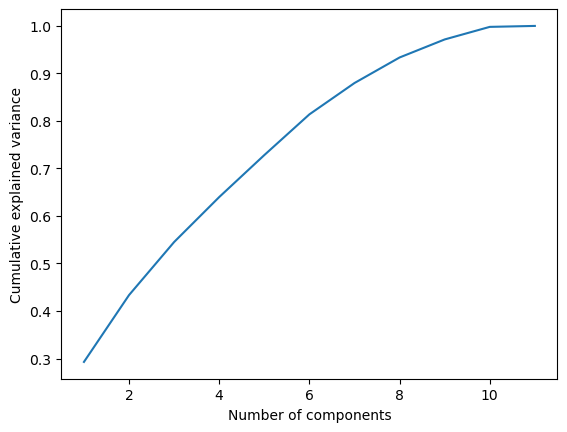

In [60]:
for i in range(1,12):
    print('PCA',i,'components:',np.sum(pca.explained_variance_ratio_[:i]))
    
#Plot corresponding graph
plt.plot(range(1,12),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

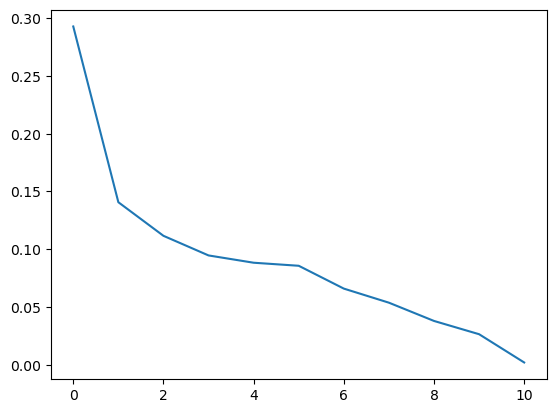

In [283]:
plt.plot(pca.explained_variance_ratio_)


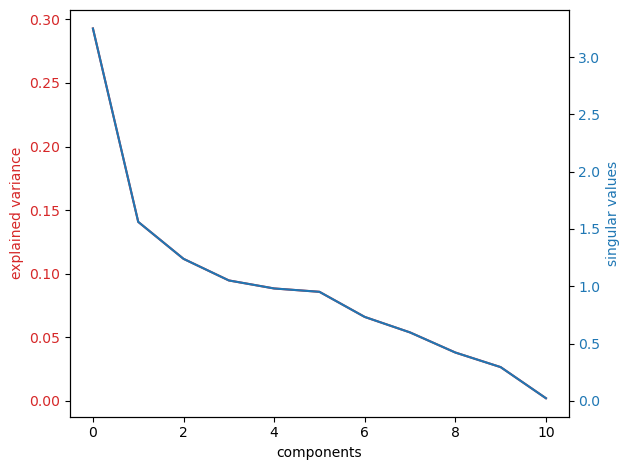

In [282]:
# Create some mock data

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('components')
ax1.set_ylabel('explained variance', color=color)
ax1.plot(pca.explained_variance_ratio_, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('singular values', color=color)  # we already handled the x-label with ax1
ax2.plot(pca.explained_variance_, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [105]:
#print difference between i and i+1 compoenents explained variance
for i in range(1,11):
    print('PCA',i,'vs',i+1,pca.explained_variance_ratio_[i+1]- pca.explained_variance_ratio_[i])

PCA 1 vs 2 -0.029075985054784786
PCA 2 vs 3 -0.01698729511375993
PCA 3 vs 4 -0.006310590730341972
PCA 4 vs 5 -0.0026355812768765197
PCA 5 vs 6 -0.019759610325631144
PCA 6 vs 7 -0.012187213464967733
PCA 7 vs 8 -0.015808941574809166
PCA 8 vs 9 -0.011479673122356333
PCA 9 vs 10 -0.02447006129086915


IndexError: index 11 is out of bounds for axis 0 with size 11

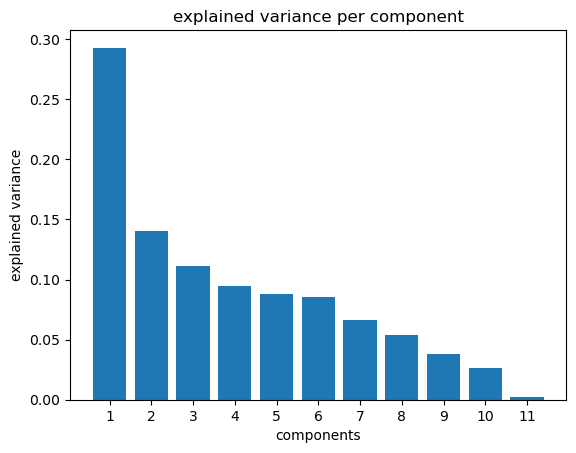

In [281]:
#plot distribution of eigenvalues of each component
plt.bar(range(11),pca.explained_variance_ratio_)
plt.xticks(range(11),range(1,12))
plt.xlabel('components')
plt.ylabel('explained variance')
plt.title('explained variance per component')
plt.show()


In [77]:
re_pca = []
for c in range(2,12):
    pca = PCA(n_components=c,random_state=random_state)
    pca.fit(X_train)
    re_pca.append(((pca.inverse_transform(pca.transform(X_train)) - X_train) ** 2).mean())

In [78]:
re_pca

[0.5714184647384754,
 0.45880189942263144,
 0.3633215188903957,
 0.2742070399407659,
 0.18775124252167544,
 0.12122824379269768,
 0.06699927660519873,
 0.028717812669101016,
 0.0020166385061985226,
 1.0682016297404584e-30]

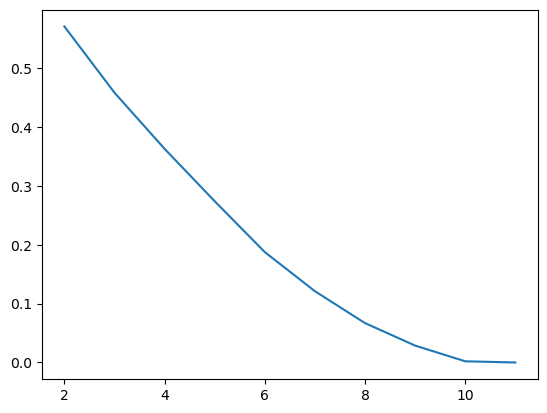

In [79]:
plt.plot(range(2,12),re_pca)

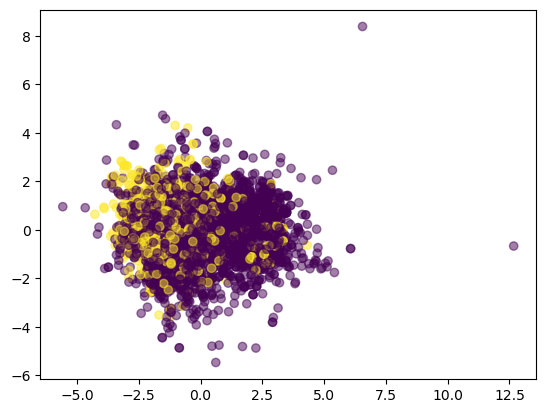

In [11]:
pca = PCA(n_components=6,random_state=random_state)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#plot PCA with different markers for each class
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train,alpha=0.5)



(3918, 6)

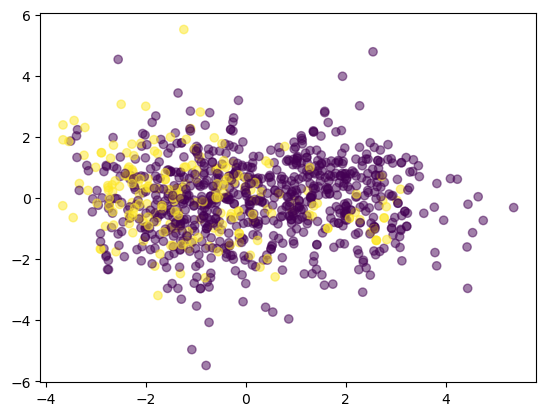

In [ ]:
plt.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test,alpha=0.5)

## Fast ICa

In [68]:
from sklearn.decomposition import FastICA

ica = FastICA(random_state=random_state)
ica.fit(X_train)

FastICA(random_state=75)

In [275]:
from scipy.stats import kurtosis
kurtosis(ica.transform(X_train)).mean()

1.0349353836046797

Text(0, 0.5, 'kurtosis')

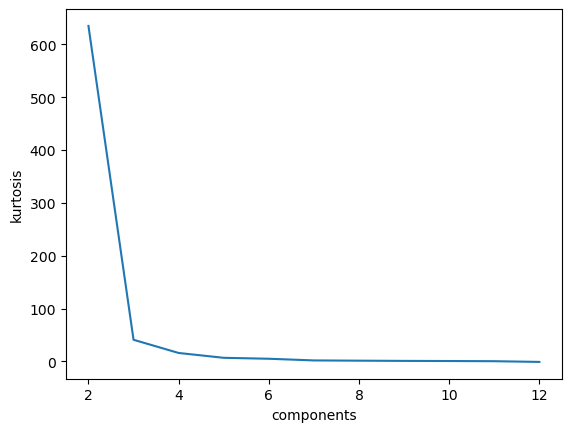

In [52]:
from scipy.stats import kurtosis
kurtosis(ica.transform(X_train))

#Plot the kurtosis of features in descending order
plt.plot(range(2,13),sorted(kurtosis(ica.transform(X_train),axis=0),reverse=True))
plt.xlabel('components')
plt.ylabel('kurtosis')

In [69]:
n_feat = 3
#Select the n_feat best features (best kurtosis)

ind_feat = np.argsort(kurtosis(ica.transform(X_train),axis=0))[::-1][:n_feat]

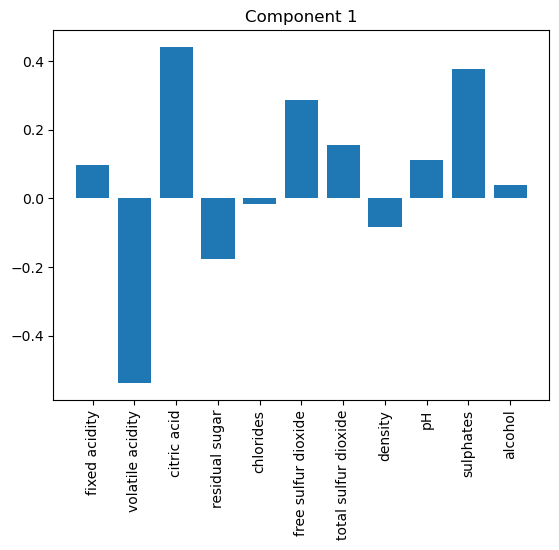

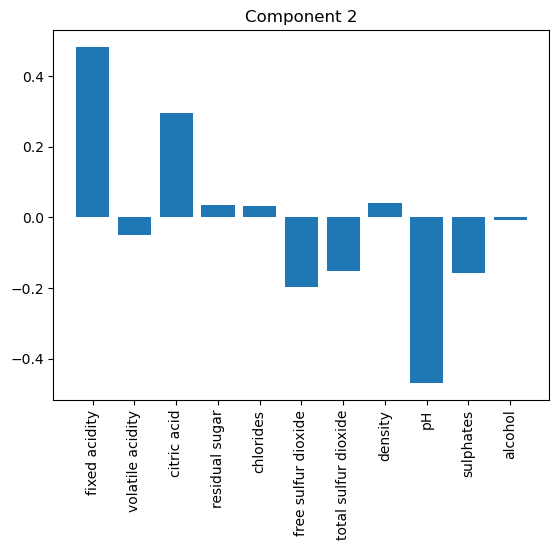

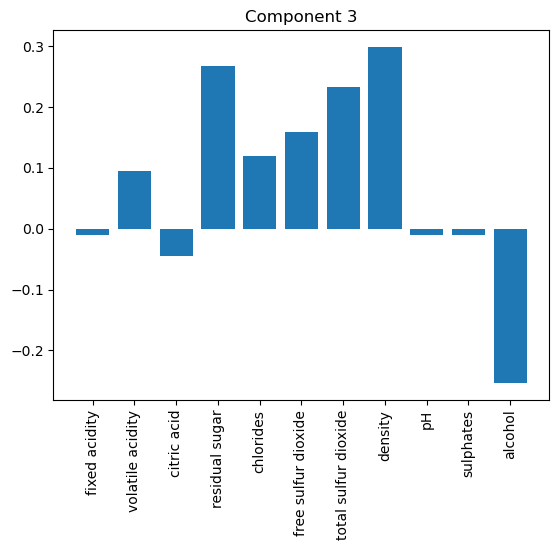

In [286]:
#for each component, plot the histogram of the corresponding feature
for _,i in enumerate(ind_feat):
    plt.bar(range(11),(ica.components_[i,:]))
    plt.title('Component '+str(_+1))
    plt.xticks(range(11),df.columns[:-1],rotation=90)
    plt.show()


In [70]:
X_train_ica = ica.transform(X_train)[:,ind_feat]
X_test_ica = ica.transform(X_test)[:,ind_feat]



In [87]:
sorted(kurtosis(ica.transform(X_train),axis=0))

[-0.876874222931761,
 0.4916849803357888,
 0.8306238904580061,
 1.0738992649418249,
 1.4875447931620398,
 1.956358544246343,
 5.11637704148637,
 6.900258513222335,
 16.044565308094164,
 41.03149601608567,
 634.7222993179175]

## Randomized projection

In [ ]:
from sklearn.random_projection import GaussianRandomProjection
proj_errors = []
for seeds in 10*np.arange(1,11):
    proj_error = []
    for comp in range(2,12):
        grp = GaussianRandomProjection(n_components=comp,random_state=seeds)
        grp.fit(X_train)

        X_train_grp = grp.transform(X_train)
        X_test_grp = grp.transform(X_test)

        #Reconstruction error
        from sklearn.metrics import mean_squared_error
        proj_error.append(mean_squared_error(X_train,grp.inverse_transform(X_train_grp)))
        
    proj_errors.append(proj_error)
    



In [287]:
from sklearn.random_projection import GaussianRandomProjection
rp_error = {}
for seeds in range(1,5):
    rp_error[seeds] = []
    for c in range(2,12):
        grp = GaussianRandomProjection(random_state=seeds,n_components=c)
        grp.fit(X_train)
        #print(np.linalg.norm(grp.inverse_transform(grp.transform(X_train)) - X_train))
        rp_error[seeds].append(np.linalg.norm(grp.inverse_transform(grp.transform(X_train)) - X_train)/1)


([<matplotlib.axis.XTick at 0x2c796e410>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

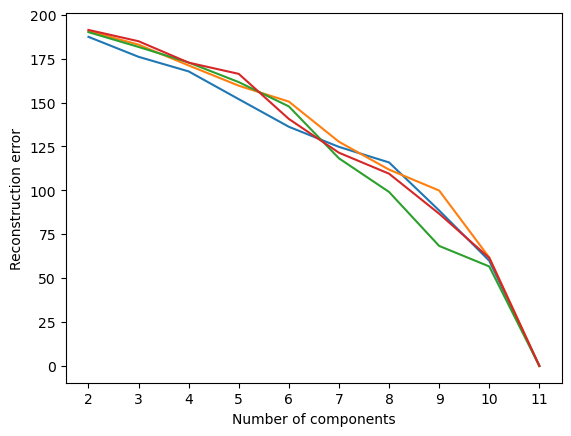

In [289]:
for seeds in range(1,5):
    plt.plot(range(2,12),rp_error[seeds],label='seed '+str(seeds))
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')
plt.xticks(range(2,12))




AS soon as you lose more than a few dimensions, it is very hard to reconstruct the data with a good accuracy, Very noisy???

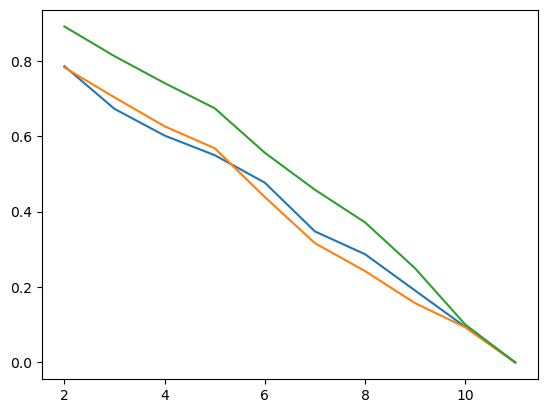

In [ ]:
plt.plot(range(2,12),proj_errors[0],label='seed=10')
plt.plot(range(2,12),proj_errors[1],label='seed=20')
plt.plot(range(2,12),proj_errors[2],label='seed=30')

## ISOMAP

In [12]:
from sklearn.manifold import Isomap
iso= Isomap(n_components=6)
iso.fit(X_train)


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Isomap(n_components=6)

In [31]:
rc_iso = []
for c in range(2,12):
    print(c)
    iso = Isomap(n_components=c)
    iso.fit(X_train)
    rc_iso.append(iso.reconstruction_error())

2


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


3


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


4


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


5


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


6


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


7


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


8


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


9


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


10


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


11


/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Text(0, 0.5, 'Reconstruction error')

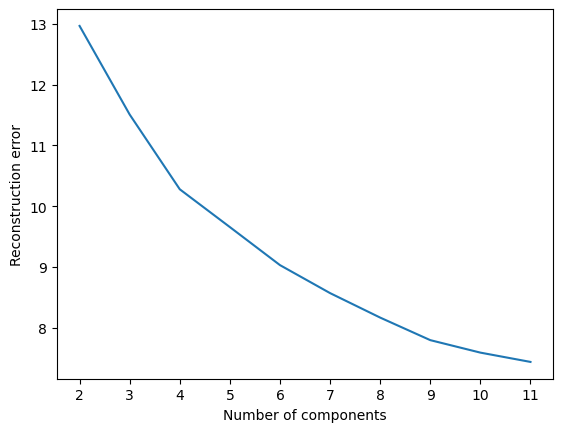

In [33]:
plt.plot(range(2,12),rc_iso)
plt.xticks(range(2,12))
plt.xlabel('Number of components')
plt.ylabel('Reconstruction error')


In [410]:
iso = Isomap(n_components=6)
iso.fit(X_train)

X_train_iso = iso.transform(X_train)

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [411]:
X_test_iso = iso.transform(X_test)

In [326]:
#vif for iso
vif = []
for i in range(X_train_iso.shape[1]):
    vif.append(variance_inflation_factor(X_train_iso,i))
    
for _,i in enumerate(vif):
    print(_,i)

0 1.0000000000000042
1 1.000000000000002
2 0.9999999999999984
3 0.9999999999999971


## PART 3 : Clustering on reduced data

ICA

In [72]:
from sklearn.metrics import silhouette_score
sil_list_em_ica = []
for i in range(2,11):
    gmm = GaussianMixture(n_components=i,random_state=random_state)
    gmm.fit(X_train_ica)
    sil_list_em_ica.append(silhouette_score(X_train_ica,gmm.predict(X_train_ica)))

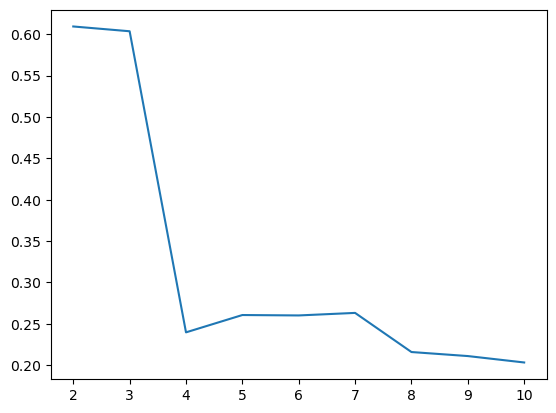

In [73]:
plt.plot(range(2,11),sil_list_em_ica)

In [74]:
from sklearn.metrics import confusion_matrix
gmm = GaussianMixture(n_components=2,random_state=random_state)
gmm.fit(X_train_ica)

GaussianMixture(n_components=2, random_state=75)

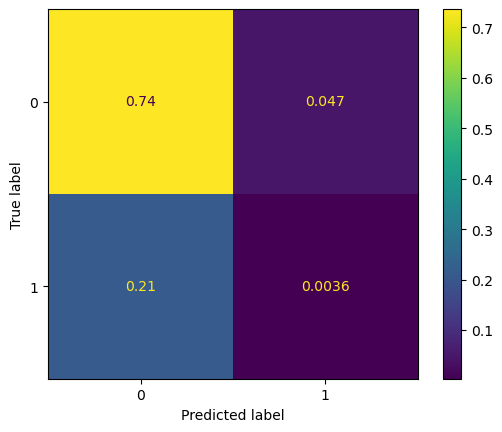

In [75]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train,gmm.predict(X_train_ica),normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot()

Kmean for ICA

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_list_kmean_ica = []

for i in range(2,12):
    
    kmeans = KMeans(n_clusters=i,random_state=random_state)
    kmeans.fit(X_train_ica)
    sil_list_kmean_ica.append(silhouette_score(X_train_ica,kmeans.predict(X_train_ica)))

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

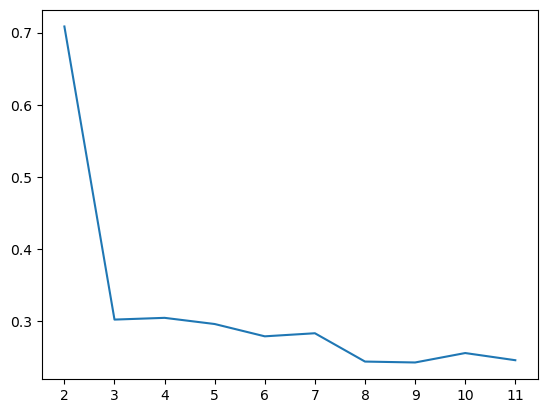

In [77]:
plt.plot(range(2,12),sil_list_kmean_ica)
plt.xticks(range(2,12))
plt.show()

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


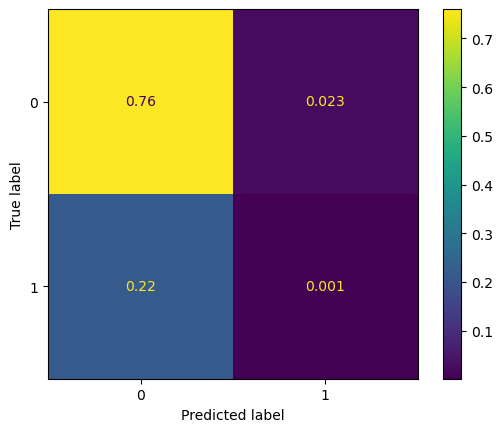

In [305]:
km_ica = KMeans(n_clusters=2,random_state=random_state)
km_ica.fit(X_train_ica)

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train,km_ica.predict(X_train_ica),normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot()

### Isomap

In [62]:
from sklearn.metrics import silhouette_score
sil_list_em_iso = []
for i in range(2,11):
    gmm = GaussianMixture(n_components=i,random_state=random_state)
    gmm.fit(X_train_iso)
    sil_list_em_iso.append(silhouette_score(X_train_iso,gmm.predict(X_train_iso)))

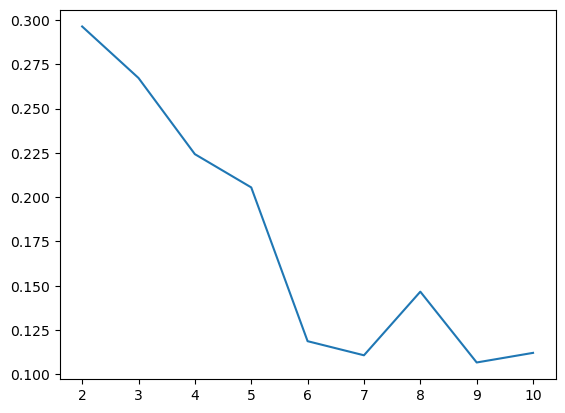

In [63]:
plt.plot(range(2,11),sil_list_em_iso)

In [412]:
from sklearn.metrics import confusion_matrix
gmm = GaussianMixture(n_components=2,random_state=random_state)
gmm.fit(X_train_iso)

GaussianMixture(n_components=2, random_state=75)

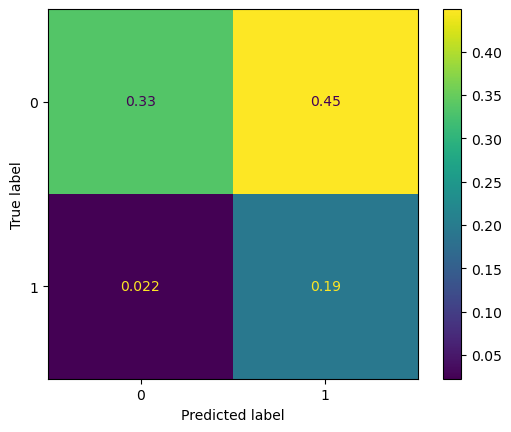

In [413]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train,gmm.predict(X_train_iso),normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])

disp.plot()

kmeans

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_list_kmean_iso = []

for i in range(2,12):
    
    kmeans = KMeans(n_clusters=i,random_state=random_state)
    kmeans.fit(X_train_iso)
    sil_list_kmean_iso.append(silhouette_score(X_train_iso,kmeans.predict(X_train_iso)))

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

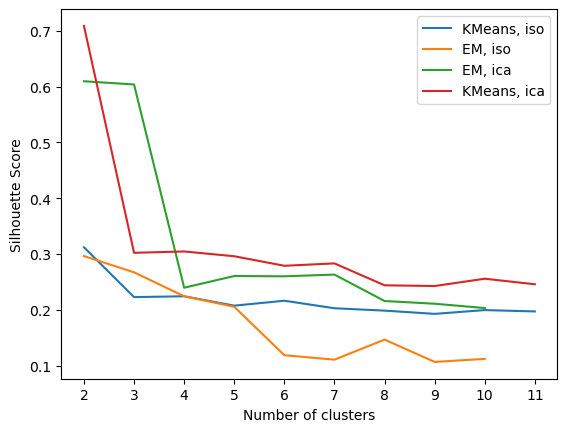

In [79]:
plt.plot(range(2,12),sil_list_kmean_iso,label = 'KMeans, iso')
plt.plot(range(2,11),sil_list_em_iso, label = 'EM, iso')
plt.plot(range(2,11),sil_list_em_ica, label = 'EM, ica')
plt.plot(range(2,12),sil_list_kmean_ica, label = 'KMeans, ica')
plt.xticks(range(2,12))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

/Users/baptistecarbillet/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


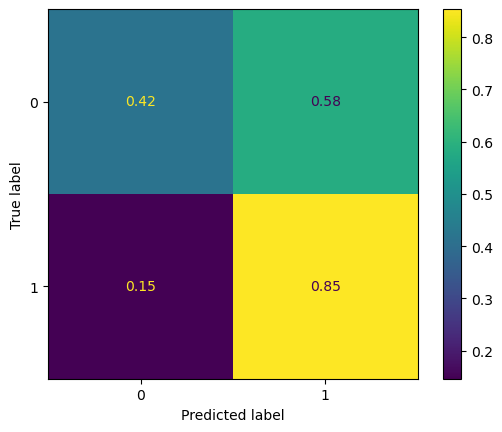

In [414]:
km_iso = KMeans(n_clusters=2,random_state=random_state)
km_iso.fit(X_train_iso)

from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_train,km_iso.predict(X_train_iso),normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[str(i) for i in range(2)])

disp.plot()

## Part 4

In [333]:
X_train_pca

array([[ 3.05549485,  0.55201797, -0.1048515 , -0.78933001,  1.57103807,
         0.12635132],
       [ 3.0226534 , -0.5780463 , -0.17113758, -0.42574786, -0.52317944,
        -0.72826745],
       [-3.24930771, -0.44070255,  0.82293474,  0.34630251,  0.62711304,
         0.29230473],
       ...,
       [-0.04886508, -0.83508521,  0.56133561,  0.18393511, -0.32756061,
         0.20155311],
       [ 0.27489744, -0.48533632, -1.56397509,  0.72409095,  1.40037357,
         0.31030702],
       [ 1.35719792, -2.08352499, -1.09121635,  5.64919411, -2.12117937,
         1.81323206]])

In [334]:
import torch

In [420]:
X_train_iso,X_val_iso,y_train_iso,y_val_iso = train_test_split(X_train_iso,y_train,test_size=0.2,random_state=random_state)
X_train_iso = torch.from_numpy(X_train_iso).float()
X_val_iso = torch.from_numpy(X_val_iso).float()
X_test_iso = torch.from_numpy(X_test_iso).float()

y_train_iso = torch.from_numpy(y_train_iso).float()
y_train_iso = y_train_iso.reshape(-1,1)
y_val_iso = torch.from_numpy(y_val_iso).float()
y_val_iso = y_val_iso.reshape(-1,1)


In [417]:
X_train_pca,X_val_pca,y_train_pca,y_val_pca = train_test_split(X_train_pca,y_train,test_size=0.2,random_state=random_state)



X_train_pca = torch.from_numpy(X_train_pca).float()
X_val_pca = torch.from_numpy(X_val_pca).float()
X_test_pca = torch.from_numpy(X_test_pca).float()



y_train_pca = torch.from_numpy(y_train_pca).float()
y_train_pca = y_train_pca.reshape(-1,1)  
y_val_pca = torch.from_numpy(y_val_pca).float()
y_val_pca = y_val_pca.reshape(-1,1)

y_test = torch.from_numpy(y_test).float()
y_test = y_test.reshape(-1,1)





ValueError: Found input variables with inconsistent numbers of samples: [3134, 3918]

In [16]:
import torch
from torch.utils.data import DataLoader
torch.manual_seed(75)
train_dataloader_pca = DataLoader(torch.utils.data.TensorDataset(X_train_pca,y_train_pca),batch_size=64,shuffle=False)
train_dataloader_iso = DataLoader(torch.utils.data.TensorDataset(X_train_iso,y_train_iso),batch_size=64,shuffle=False)



TypeError: 'int' object is not callable

Build NN

In [14]:

from torch import nn

class NeuralNetwork2(nn.Module):
        
        def __init__(self,n_features,n_hidden,n_output,function=nn.Sigmoid()):
            super().__init__()
            self.hidden1 = nn.Linear(n_features,n_hidden)
            self.hidden2 = nn.Linear(n_hidden,n_hidden)
            self.output = nn.Linear(n_hidden,n_output)
            self.function = function
            self.sigmoid = nn.Sigmoid()
            
        def forward(self,x):
            x = self.hidden1(x)
            x = self.function(x)
            x = self.hidden2(x)
            x = self.function(x)
            x = self.output(x)
            x = self.sigmoid(x)
            return x

In [346]:
import random
import os
def seed_everything(seed=75):
  random.seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  
seed_everything()

In [361]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)

In [25]:
n_features = X_train_pca.shape[1]
n_output = 1
n_hidden = 256
loss = nn.BCELoss()
network = NeuralNetwork2(n_features,n_hidden,n_output)
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)


from sklearn.metrics import f1_score




Epochs = 500

import time
time_epoch4pca = []


train_score_h2 = []
val_score_h2 = []
loss_track_h2 = []
val_loss_h2 = []

for epoch in range(Epochs):
    
    #Stoppping criterion
    if epoch > 100 and val_score_h2[-1] < val_score_h2[-2] and val_score_h2[-2] < val_score_h2[-3] and val_score_h2[-3] < val_score_h2[-4] and val_score_h2[-4] < val_score_h2[-5]:
        print(f'Early stopping at epoch {epoch}')
        print(f'Best score : {max(val_score_h2)} at epoch {np.argmax(val_score_h2)}')
        break
    
    t = time.time()
    for _,data in enumerate(train_dataloader_pca):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    
    time_epoch4pca.append(time.time() - t)
    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train_pca)
    output_val = network(X_val_pca)
    loss_track_h2.append(loss(output_train,y_train_pca).item())
    val_loss_h2.append(loss(output_val,y_val_pca).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score_h2.append(f1_score(y_train_pca,output_train))
    val_score_h2.append(f1_score(y_val_pca,output_val))
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track_h2[-1]} - Val loss {val_loss_h2[-1]} - Train score {train_score_h2[-1]} - Val score {val_score_h2[-1]}')


Epoch 0 : Train loss 0.4374549686908722 - Val loss 0.44469767808914185 - Train score 0.31910112359550563 - Val score 0.3236514522821577
Epoch 100 : Train loss 0.06381843984127045 - Val loss 0.7154697775840759 - Train score 0.9551330798479086 - Val score 0.6176470588235293
Early stopping at epoch 138
Best score : 0.6361031518624642 at epoch 125


In [369]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)


n_features = X_train_pca.shape[1]
n_output = 1
network_best = NeuralNetwork2(n_features,256,n_output)

loss = nn.BCELoss()
optimizer = torch.optim.Adam(network_best.parameters(),lr=0.01)
from sklearn.metrics import f1_score



for epoch in range(93):
    
    #Stoppping criterion
   
    
    for _,data in enumerate(train_dataloader_pca):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network_best(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    if epoch == 92:
    #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network_best(X_train_pca)
        output_val = network_best(X_val_pca)
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        #print accuracy
        print(f'Accuracy on train set : {f1_score(y_train_pca,output_train)}')
        
        print(f'Accuracy on validation set : {f1_score(y_val_pca,output_val)}')

Accuracy on train set : 0.8856707317073171
Accuracy on validation set : 0.6144927536231884


In [370]:
#score on test
output_test = network_best(X_test_pca)
output_test = output_test.detach().numpy()
output_test = np.where(output_test > 0.5,1,0)
print(f'Accuracy on test set : {f1_score(y_test,output_test)}')

Accuracy on test set : 0.5781990521327014


ISO

In [422]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)



n_features = X_train_iso.shape[1]
n_output = 1
n_hidden = 256
loss = nn.BCELoss()
network = NeuralNetwork2(n_features,n_hidden,n_output)
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)


from sklearn.metrics import f1_score





Epochs = 500


time_epoch4iso = []
train_score_4iso = []
val_score_4iso = []
loss_track_4iso = []
val_loss_4iso = []

for epoch in range(Epochs):
    
    #Stoppping criterion
    if epoch > 100 and val_score_4iso[-1] < val_score_4iso[-2] and val_score_4iso[-2] < val_score_4iso[-3] and val_score_4iso[-3] < val_score_4iso[-4] and val_score_4iso[-4] < val_score_4iso[-5]:
        print(f'Early stopping at epoch {epoch}')
        print(f'Best score : {max(val_score_4iso)} at epoch {np.argmax(val_score_4iso)}')
        break
    t = time.time()
    for _,data in enumerate(train_dataloader_iso):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    
    time_epoch4iso.append(time.time() - t)
    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train_iso)
    output_val = network(X_val_iso)
    loss_track_4iso.append(loss(output_train,y_train_iso).item())
    val_loss_4iso.append(loss(output_val,y_val_iso).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score_4iso.append(f1_score(y_train_iso,output_train))
    val_score_4iso.append(f1_score(y_val_iso,output_val))
    
    if epoch % 40 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track_4iso[-1]} - Val loss {val_loss_4iso[-1]} - Train score {train_score_4iso[-1]} - Val score {val_score_4iso[-1]}')

Epoch 0 : Train loss 0.4600135087966919 - Val loss 0.47395557165145874 - Train score 0.0 - Val score 0.0
Epoch 40 : Train loss 0.31643345952033997 - Val loss 0.45206111669540405 - Train score 0.6045723962743438 - Val score 0.4655737704918032
Epoch 80 : Train loss 0.15254448354244232 - Val loss 0.5770198106765747 - Train score 0.8571428571428571 - Val score 0.5826330532212884
Epoch 120 : Train loss 0.08342339098453522 - Val loss 0.7611244916915894 - Train score 0.9166666666666666 - Val score 0.5537459283387622
Early stopping at epoch 152
Best score : 0.6321839080459771 at epoch 147


In [424]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)



best_ep = 147
n_features = X_train_iso.shape[1]
n_output = 1
network_best = NeuralNetwork2(n_features,256,n_output)

loss = nn.BCELoss()
optimizer = torch.optim.Adam(network_best.parameters(),lr=0.01)
from sklearn.metrics import f1_score



for epoch in range(best_ep + 1):
    
    #Stoppping criterion
   
    
    for _,data in enumerate(train_dataloader_iso):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network_best(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    if epoch == best_ep:
    #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network_best(X_train_iso)
        output_val = network_best(X_val_iso)
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        #print accuracy
        print(f'Accuracy on train set : {f1_score(y_train_iso,output_train)}')
        
        print(f'Accuracy on validation set : {f1_score(y_val_iso,output_val)}')

Accuracy on train set : 0.9683734939759037
Accuracy on validation set : 0.6321839080459771


In [426]:
#score on test
output_test = network_best(X_test_iso)
output_test = output_test.detach().numpy()
output_test = np.where(output_test > 0.5,1,0)
print(f'Accuracy on test set : {f1_score(y_test,output_test)}')

Accuracy on test set : 0.5413533834586466


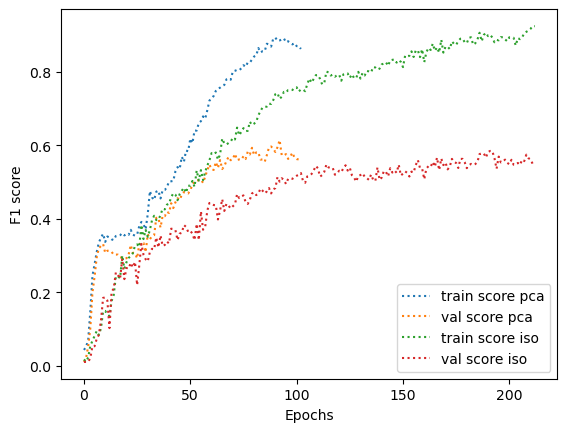

In [387]:
#Plot the train score  and val score for PCA and iso
plt.plot(range(len(train_score_h2)),train_score_h2,label='train score pca',linestyle='dotted')
plt.plot(range(len(val_score_h2)),val_score_h2,label='val score pca',linestyle='dotted')
plt.plot(range(len(train_score_4iso)),train_score_4iso,label='train score iso',linestyle='dotted')
plt.plot(range(len(val_score_4iso)),val_score_4iso,label='val score iso',linestyle='dotted')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.legend()
plt.show()

In [388]:
#print mean time per epoch for pca and iso
print('Mean time per epoch for PCA :',np.mean(time_epoch4pca))
print('Mean time per epoch for ISO :',np.mean(time_epoch4iso))

Mean time per epoch for PCA : 0.04661728108970864
Mean time per epoch for ISO : 0.04680442250390568


## Part 5

In [17]:
km_train = km.predict(X_train)
km_test = km.predict(X_test)

gmm_train = gmm.predict(X_train)
gmm_test = gmm.predict(X_test)



X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Add cluster predictions to the dataset

X_train_pca = np.concatenate((X_train_pca,km_train.reshape(-1,1)),axis=1)
X_test_pca = np.concatenate((X_test_pca,km_test.reshape(-1,1)),axis=1)

X_train_pca = np.concatenate((X_train_pca,gmm_train.reshape(-1,1)),axis=1)
X_test_pca = np.concatenate((X_test_pca,gmm_test.reshape(-1,1)),axis=1)

X_train_iso = iso.transform(X_train)
X_test_iso = iso.transform(X_test)


X_train_iso = np.concatenate((X_train_iso,km_train.reshape(-1,1)),axis=1)
X_test_iso = np.concatenate((X_test_iso,km_test.reshape(-1,1)),axis=1)

X_train_iso = np.concatenate((X_train_iso,gmm_train.reshape(-1,1)),axis=1)
X_test_iso = np.concatenate((X_test_iso,gmm_test.reshape(-1,1)),axis=1)

X_train_pca,X_val_pca,y_train_pca,y_val_pca = train_test_split(X_train_pca,y_train,test_size=0.2,random_state=random_state)
X_train_iso,X_val_iso,y_train_iso,y_val_iso = train_test_split(X_train_iso,y_train,test_size=0.2,random_state=random_state)

X_train_pca = torch.from_numpy(X_train_pca).float()
X_val_pca = torch.from_numpy(X_val_pca).float()
X_test_pca = torch.from_numpy(X_test_pca).float()

X_train_iso = torch.from_numpy(X_train_iso).float()
X_val_iso = torch.from_numpy(X_val_iso).float()
X_test_iso = torch.from_numpy(X_test_iso).float()

y_train_pca = torch.from_numpy(y_train_pca).float()
y_train_pca = y_train_pca.reshape(-1,1)  
y_val_pca = torch.from_numpy(y_val_pca).float()
y_val_pca = y_val_pca.reshape(-1,1)



y_train_iso = torch.from_numpy(y_train_iso).float()
y_train_iso = y_train_iso.reshape(-1,1)
y_val_iso = torch.from_numpy(y_val_iso).float()
y_val_iso = y_val_iso.reshape(-1,1)



In [18]:
from torch.utils.data import DataLoader
torch.manual_seed(75)
train_dataloader_pca = DataLoader(torch.utils.data.TensorDataset(X_train_pca,y_train_pca),batch_size=64,shuffle=False)
train_dataloader_iso = DataLoader(torch.utils.data.TensorDataset(X_train_iso,y_train_iso),batch_size=64,shuffle=False)


## Train the network

pca

In [27]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)



n_features = X_train_pca.shape[1]
n_output = 1
n_hidden = 256
loss = nn.BCELoss()
network = NeuralNetwork2(n_features,n_hidden,n_output)
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)


from sklearn.metrics import f1_score


time_epich5pca = []

Epochs = 500



train_score_5pca = []
val_score_5pca = []
loss_track_5pca = []
val_loss_5pca = []

for epoch in range(Epochs):
    
    #Stoppping criterion
    if epoch > 100 and val_score_5pca[-1] < val_score_5pca[-2] and val_score_5pca[-2] < val_score_5pca[-3] and val_score_5pca[-3] < val_score_5pca[-4] and val_score_5pca[-4] < val_score_5pca[-5]:
        print(f'Early stopping at epoch {epoch}')
        print(f'Best score : {max(val_score_5pca)} at epoch {np.argmax(val_score_5pca)}')
        break
    t = time.time()
    for _,data in enumerate(train_dataloader_pca):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    time_epich5pca.append(time.time() -t)

    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train_pca)
    output_val = network(X_val_pca)
    loss_track_5pca.append(loss(output_train,y_train_pca).item())
    val_loss_5pca.append(loss(output_val,y_val_pca).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score_5pca.append(f1_score(y_train_pca,output_train))
    val_score_5pca.append(f1_score(y_val_pca,output_val))
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track_5pca[-1]} - Val loss {val_loss_5pca[-1]} - Train score {train_score_5pca[-1]} - Val score {val_score_5pca[-1]}')

Epoch 0 : Train loss 0.4356054663658142 - Val loss 0.4413194954395294 - Train score 0.42165242165242167 - Val score 0.45454545454545453
Epoch 100 : Train loss 0.0815735012292862 - Val loss 0.6454841494560242 - Train score 0.9247478665632274 - Val score 0.6035502958579881
Epoch 200 : Train loss 0.009710189886391163 - Val loss 0.9166908264160156 - Train score 0.9977528089887641 - Val score 0.6345609065155806
Epoch 300 : Train loss 0.00258649792522192 - Val loss 1.348861575126648 - Train score 1.0 - Val score 0.619047619047619
Early stopping at epoch 312
Best score : 0.6589595375722543 at epoch 173


In [395]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)


best_ep = 173
n_features = X_train_pca.shape[1]
n_output = 1
network_best = NeuralNetwork2(n_features,256,n_output)

loss = nn.BCELoss()
optimizer = torch.optim.Adam(network_best.parameters(),lr=0.01)
from sklearn.metrics import f1_score



for epoch in range(best_ep + 1):
    
    #Stoppping criterion
   
    
    for _,data in enumerate(train_dataloader_pca):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network_best(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    if epoch == best_ep:
    #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network_best(X_train_pca)
        output_val = network_best(X_val_pca)
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        #print accuracy
        print(f'Accuracy on train set : {f1_score(y_train_pca,output_train)}')
        
        print(f'Accuracy on validation set : {f1_score(y_val_pca,output_val)}')

Accuracy on train set : 0.9985007496251874
Accuracy on validation set : 0.6589595375722543


In [396]:
#score on test
output_test = network_best(X_test_pca)
output_test = output_test.detach().numpy()
output_test = np.where(output_test > 0.5,1,0)
print(f'Accuracy on test set : {f1_score(y_test,output_test)}')

Accuracy on test set : 0.6253101736972705


# ISO

In [21]:
SEED = 75
import random
import time
# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)



n_features = X_train_iso.shape[1]
n_output = 1
n_hidden = 256
loss = nn.BCELoss()
network = NeuralNetwork2(n_features,n_hidden,n_output)
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)


from sklearn.metrics import f1_score


time_epich5iso = []

Epochs = 500



train_score_iso5 = []
val_score_iso5 = []
loss_track_iso5 = []
val_loss_iso5 = []

for epoch in range(Epochs):
    
    #Stoppping criterion
    if epoch > 100 and val_score_iso5[-1] < val_score_iso5[-2] and val_score_iso5[-2] < val_score_iso5[-3] and val_score_iso5[-3] < val_score_iso5[-4] and val_score_iso5[-4] < val_score_iso5[-5]:
        print(f'Early stopping at epoch {epoch}')
        print(f'Best score : {max(val_score_iso5)} at epoch {np.argmax(val_score_iso5)}')
        break
    t = time.time()
    for _,data in enumerate(train_dataloader_iso):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    
    time_epich5iso.append(time.time() - t)
    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train_iso)
    output_val = network(X_val_iso)
    loss_track_iso5.append(loss(output_train,y_train_iso).item())
    val_loss_iso5.append(loss(output_val,y_val_iso).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score_iso5.append(f1_score(y_train_iso,output_train))
    val_score_iso5.append(f1_score(y_val_iso,output_val))
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track_iso5[-1]} - Val loss {val_loss_iso5[-1]} - Train score {train_score_iso5[-1]} - Val score {val_score_iso5[-1]}')

Epoch 0 : Train loss 0.45503926277160645 - Val loss 0.46294131875038147 - Train score 0.020588235294117647 - Val score 0.011049723756906079
Epoch 100 : Train loss 0.09407290071249008 - Val loss 0.8303295969963074 - Train score 0.9180588703261735 - Val score 0.5668789808917197
Early stopping at epoch 177
Best score : 0.6149253731343284 at epoch 164


In [22]:
SEED = 75

# Python RNG
random.seed(SEED)

# Numpy RNG
np.random.seed(SEED)

# PyTorch RNGs
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.use_deterministic_algorithms(True)



best_ep = 164
n_features = X_train_iso.shape[1]
n_output = 1
network_best = NeuralNetwork2(n_features,256,n_output)

loss = nn.BCELoss()
optimizer = torch.optim.Adam(network_best.parameters(),lr=0.01)
from sklearn.metrics import f1_score



for epoch in range(best_ep + 1):
    
    #Stoppping criterion
   
    
    for _,data in enumerate(train_dataloader_iso):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network_best(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    if epoch == best_ep:
    #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network_best(X_train_iso)
        output_val = network_best(X_val_iso)
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        #print accuracy
        print(f'Accuracy on train set : {f1_score(y_train_iso,output_train)}')
        
        print(f'Accuracy on validation set : {f1_score(y_val_iso,output_val)}')

Accuracy on train set : 0.9720332577475433
Accuracy on validation set : 0.6149253731343284


In [23]:
#score on test
output_test = network_best(X_test_iso)
output_test = output_test.detach().numpy()
output_test = np.where(output_test > 0.5,1,0)
print(f'Accuracy on test set : {f1_score(y_test,output_test)}')

Accuracy on test set : 0.5561224489795918


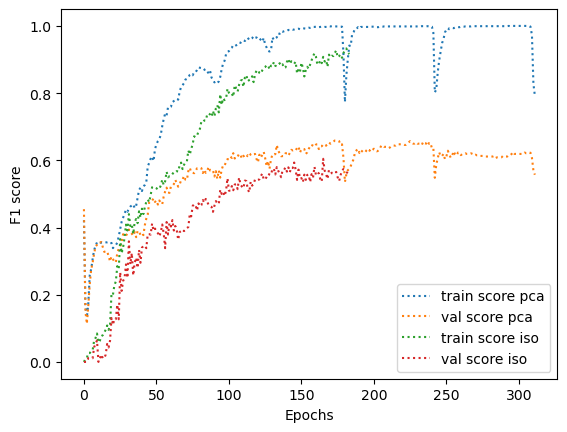

In [401]:
#plearning curve
plt.plot(range(len(train_score_5pca)),train_score_5pca,label='train score pca',linestyle='dotted')
plt.plot(range(len(val_score_5pca)),val_score_5pca,label='val score pca',linestyle='dotted')
plt.plot(range(len(train_score_iso5)),train_score_iso5,label='train score iso',linestyle='dotted')
plt.plot(range(len(val_score_iso5)),val_score_iso5,label='val score iso',linestyle='dotted')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.legend()
plt.show()

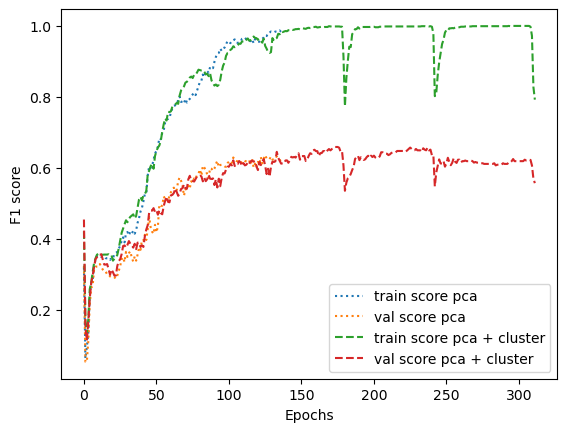

In [29]:
#plot learning curve for PCA, with  cluster labels and without
plt.plot(range(len(train_score_h2)),train_score_h2,label='train score pca',linestyle='dotted')
plt.plot(range(len(val_score_h2)),val_score_h2,label='val score pca',linestyle='dotted')
plt.plot(range(len(train_score_5pca)),train_score_5pca,label='train score pca + cluster',linestyle='--')
plt.plot(range(len(val_score_5pca)),val_score_5pca,label='val score pca + cluster',linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.legend()
plt.show()

In [405]:
#print mean time per epoch
print("mean time per epoch for pca :",np.mean(time_epich5pca))
print("mean time per epoch for iso :",np.mean(time_epich5iso))


mean time per epoch for pca : 0.0563740883118067
mean time per epoch for iso : 0.050262617028277855
